In [1]:
import os

import pandas as pd
import numpy as np
from glob import  glob

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install python-vivid

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
input_dir = '/src/atmacup/atmacup11/data/inputs/'
photo_dir = os.path.join(input_dir, 'photos')
photo_pathes = glob(os.path.join(photo_dir, "*.jpg"))
output_dir = '/src/atmacup/atmacup11/data/outputs/'

os.makedirs(output_dir, exist_ok=True)

train_df = pd.read_csv(os.path.join(input_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(input_dir, 'test.csv'))

In [4]:
train_df = pd.read_csv(os.path.join(input_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(input_dir, 'test.csv'))
material_df = pd.read_csv(os.path.join(input_dir, 'materials.csv'))
technique_df = pd.read_csv(os.path.join(input_dir, 'techniques.csv'))

In [5]:
from matplotlib_venn import venn2

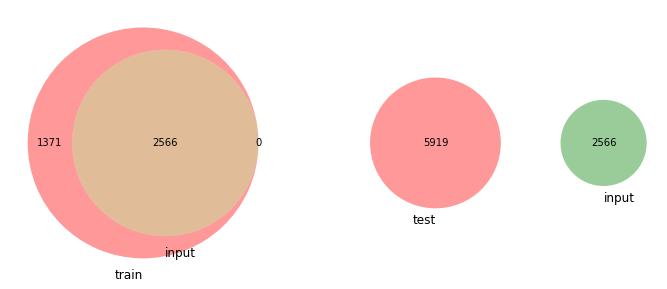

In [6]:
input_df = technique_df

fig, axes = plt.subplots(figsize=(12, 5), ncols=2)

venn2(subsets=(
    set(train_df['object_id']), set(input_df['object_id'])
), set_labels=('train', 'input'), ax=axes[0])

venn2(subsets=(
    set(test_df['object_id']), set(input_df['object_id'])
), set_labels=('test', 'input'), ax=axes[1])

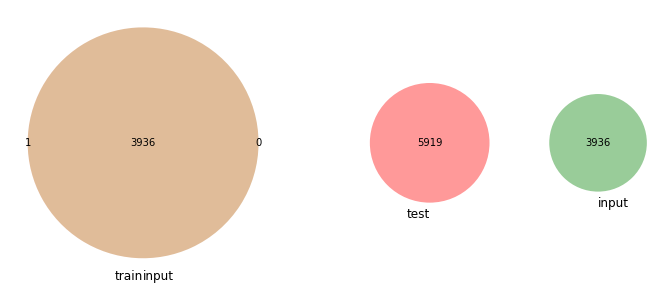

In [7]:
input_df = material_df

fig, axes = plt.subplots(figsize=(12, 5), ncols=2)
                         
venn2(subsets=(
    set(train_df['object_id']), set(input_df['object_id'])
), set_labels=('train', 'input'), ax=axes[0])

venn2(subsets=(
    set(test_df['object_id']), set(input_df['object_id'])
), set_labels=('test', 'input'), ax=axes[1])


In [8]:
train_df.head()

object_id  sorting_date         art_series_id  target
0  002bff09b09998d0be65          1631  509357f67692a6a45626       1
1  00309fb1ef05416f9c1f          1900  7987b47bbe5dc3039179       3
2  003a1562e97f79ba96dc          1834  ded7c3c9636708e5b14c       3
3  004890880e8e7431147b          1743  582ac2d7f0cef195b605       2
4  00718c32602425f504c1          1885  64c907f0c08dce4fb8e8       3

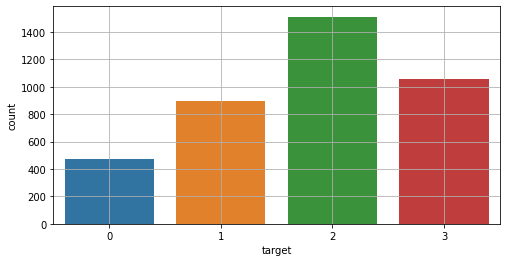

In [9]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=train_df, x='target', ax=ax)
ax.grid()

In [10]:
train_df['target'].value_counts().sort_index()

0     475
1     896
2    1511
3    1055
Name: target, dtype: int64

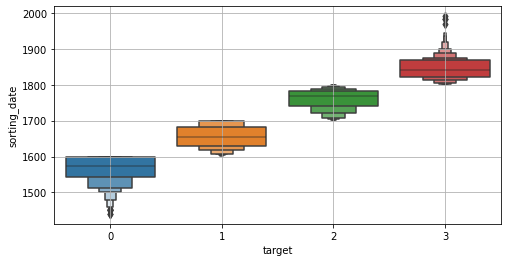

In [11]:
fig, ax = plt.subplots(figsize=(8,4))
sns.boxenplot(data=train_df, x='target', y='sorting_date', ax=ax)
ax.grid()

In [12]:
train_df.groupby('target')['sorting_date'].agg(['min', 'max', 'median', 'size'])

min   max  median  size
target                          
0       1440  1600    1574   475
1       1601  1700    1655   896
2       1701  1800    1770  1511
3       1801  1991    1841  1055

In [13]:
test_df.head()

object_id
0  0009e50b94be36ccad39
1  000bd5e82eb22f199f44
2  0015f44de1854f617516
3  00388a678879ba1efa27
4  005e1e7c6496902d23f3

In [14]:
from PIL import Image

In [15]:
def to_img_path(object_id):
    return os.path.join(photo_dir, f'{object_id}.jpg')

def read_image(object_id):
    return Image.open(to_img_path(object_id))

In [16]:
img = read_image(train_df['object_id'].iat[0])

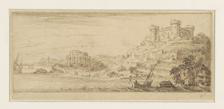

In [17]:
img

In [18]:
from torchvision import transforms as T

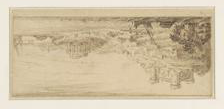

In [19]:
T.RandomVerticalFlip(p=1)(img)

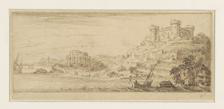

In [20]:
T.RandomVerticalFlip(p=0.001)(img)

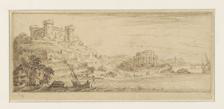

In [21]:
T.RandomHorizontalFlip(p=1)(img)

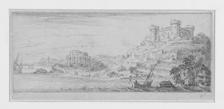

In [22]:
T.RandomGrayscale(1)(img)

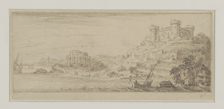

In [23]:
T.ColorJitter(brightness=.3, contrast=.5, saturation=[.8, 1.3])(img)

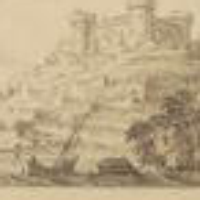

In [24]:
T.RandomResizedCrop(size=(200,200),)(img)

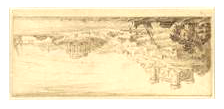

In [25]:
converter = T.Compose([
    T.RandomVerticalFlip(p=1),
    T.ColorJitter(brightness=.5, contrast=.5)
])

converter(img)

In [26]:
import torch
from torchvision.models import resnet34
from torch import nn

In [27]:
model = resnet34(pretrained=False)

In [28]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [29]:
converter = T.Compose([
    T.RandomVerticalFlip(p=1),
    T.ColorJitter(brightness=.5, contrast=.5),
    T.ToTensor()
])

In [30]:
x = converter(img)

In [31]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [32]:
type(x)

torch.Tensor

In [33]:
x.shape

torch.Size([3, 109, 224])

In [34]:
# pytorchはまとめて処理することを想定しているから、unsqueezeで1足す必要がある
# もしなかったら、モデルは「３枚の画像、１０９チャンネル、２２４の高さって想定と違う認識をしてしまう
x.unsqueeze(0).shape

torch.Size([1, 3, 109, 224])

In [35]:
output = model(x.unsqueeze(0))

In [36]:
output

tensor([[ 0.6506,  1.3284, -0.1414,  0.0365,  0.3114, -0.5741, -0.4175,  1.0541,
         -0.8060, -0.9152,  0.5592,  0.3055, -0.0569, -0.3539, -0.1250, -0.2401,
          0.1922,  0.5648,  0.3709, -0.1290,  0.4579, -0.0053, -0.7633,  0.4544,
         -0.3531,  0.2009,  0.5341, -0.0513,  0.5314,  0.2607,  0.0023,  0.2449,
          0.6812,  0.4359,  0.8697,  0.1321, -0.2457,  0.2785, -0.4037, -1.2809,
         -0.7034,  0.0147,  0.4927,  0.9532,  0.2271, -0.2382, -1.4824,  0.2600,
         -0.1372,  0.8285,  0.9681, -0.4463,  0.2999, -0.3364, -0.4287,  0.3813,
          0.8038,  0.4866, -0.0382, -0.4086,  0.1623, -0.7221, -0.2844,  0.1962,
         -1.0284, -0.6277, -0.4066,  0.6156,  1.5970,  0.0936,  0.3269, -0.7603,
         -0.1379,  0.5388, -0.2794,  0.5627,  0.9027,  0.3822,  0.3046, -0.2623,
          0.4991, -0.8302,  0.3345,  0.0245, -0.6941,  0.4732,  0.1664,  0.5981,
         -0.7695,  0.3185,  0.8090, -0.3850,  0.8776,  0.5551, -0.4025, -1.6704,
          0.7059, -0.3432,  

In [37]:
output.shape

torch.Size([1, 1000])

In [38]:
model.fc = nn.Linear(in_features=512, out_features=1, bias=True)

In [39]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [40]:
model(x.unsqueeze(0))

tensor([[-0.2786]], grad_fn=<AddmmBackward>)

In [41]:
criterion = nn.MSELoss()

In [42]:
(3 - 10) ** 2

49

In [43]:
criterion(torch.Tensor([3]), torch.Tensor([10]))

tensor(49.)

In [44]:
from torch.optim import Adam

optimizer = Adam(params=model.parameters(), lr=1e-3)

In [45]:
x = converter(img)
x = x.unsqueeze(0)

label = train_df['target'].iat[0]
label = torch.Tensor([label])
label = label.reshape(-1, 1)

output = model(x)
loss = criterion(output, label)

optimizer.zero_grad()

loss.backward()

optimizer.step()

print(loss.item())

1.5745394229888916


In [46]:
label

tensor([[1.]])

In [47]:
train_df['target'].iat[0]

1

In [48]:
from torch.utils import data

IMG_MEAN = [0.485, 0.456, 0.406]
IMG_STD = [0.229, 0.224, 0.225]

class AtmaDataset(data.Dataset):
    """atmaCup用にデータ読み込み等を行なうデータ・セット"""
    object_path_key = "object_path"
    label_key = "target"

    @property
    def meta_keys(self):
        retval = [self.object_path_key]

        if self.is_train:
            retval += [self.label_key]

        return retval

    def __init__(self, meta_df: pd.DataFrame, is_train=True):
        """
        args:
            meta_df: 
                画像へのパスと label 情報が含まれている dataframe
                必ず object_path に画像へのパス, target に正解ラベルが入っている必要があります
            
            is_train:
                True のとき学習用のデータ拡張を適用します.
                False の時は単に size にリサイズを行います
        """

        self.is_train = is_train
        for k in self.meta_keys:
            if k not in meta_df:
                raise ValueError("meta df must have {}".format(k))

        self.meta_df = meta_df.reset_index(drop=True)
        self.index_to_data = self.meta_df.to_dict(orient="index")

        size = (224, 224)

        additional_items = (
            [T.Resize(size)]
            if not is_train
            else [
                T.RandomGrayscale(p=0.2),
                T.RandomVerticalFlip(),
                T.RandomHorizontalFlip(),
                T.ColorJitter(
                    brightness=0.3,
                    contrast=0.5,
                    saturation=[0.8, 1.3],
                    hue=[-0.05, 0.05],
                ),
                T.RandomResizedCrop(size),
            ]
        )

        self.transformer = T.Compose(
            [*additional_items, T.ToTensor(), T.Normalize(mean=IMG_MEAN, std=IMG_STD)]
        )

    def __getitem__(self, index):
        data = self.index_to_data[index]

        obj_path, label = data.get(self.object_path_key), data.get(self.label_key, -1)
        img = Image.open(obj_path)
        img = self.transformer(img)
        return img, label

    def __len__(self):
        return len(self.meta_df)

In [49]:
train_meta_df = train_df[['target', 'object_id']].copy()
train_meta_df['object_path'] = train_meta_df['object_id'].map(to_img_path)

dataset = AtmaDataset(meta_df=train_meta_df)

In [50]:
# この場合同時に 54 個の画像に対応した tensor と label が作られる
loader = data.DataLoader(dataset=dataset, batch_size=54, num_workers=4)

In [51]:
for x_tensor, y in loader:
    break

In [52]:
import sys

print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")

for var_name in dir():
    if not var_name.startswith("_") and sys.getsizeof(eval(var_name)) > 10000:
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))

|            Variable Name|    Memory|
 ------------------------------------ 
|                 input_df|   1273291|
|              material_df|   1273291|
|             photo_pathes|     83120|
|             technique_df|    522178|
|                  test_df|    455923|
|                 train_df|    669450|
|            train_meta_df|    819056|


In [53]:
x_tensor.shape, y.shape

(torch.Size([54, 3, 224, 224]), torch.Size([54]))

In [54]:
aa = [1,2,3]
aa += [4,5,5]
aa

[1, 2, 3, 4, 5, 5]

In [55]:
assert torch.cuda.is_available()

DEVICE = torch.device("cuda")

In [56]:
from torch.optim.optimizer import Optimizer
from collections import defaultdict

def train(
    model: nn.Module,
    optimizer: Optimizer,
    train_loader: data.DataLoader
) -> pd.Series:
    
    model.train()
    criterion = nn.MSELoss()
    
    metrics = defaultdict(float)
    n_iters = len(train_loader)
    
    for i, (x_i, y_i) in enumerate(train_loader):
        x_i = x_i.to(DEVICE)
        y_i = y_i.to(DEVICE).reshape(-1, 1).float()
        
        output = model(x_i)
        loss = criterion(output, y_i)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        metric_i = {
            "loss": loss.item()
        }
        for k, v in metric_i.items():
            metrics[k] += v
            
    for k, v in metrics.items():
        metrics[k] /= n_iters
        
    return pd.Series(metrics).add_prefix("train_")

In [57]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [58]:
a.reshape(-1, 1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [59]:
from vivid.utils import timer

n_epochs = 10

model.to(DEVICE)
optimizer = Adam(params=model.parameters(), lr=1e-3)

for epoch in range(1, n_epochs+1):
    with timer(prefix="train: epoch={}".format(epoch)):
        score_train = train(
            model, optimizer, train_loader=loader
        )
    print(score_train)
    
    break

train: epoch=1 23.314[s]
train_loss    1.440841
dtype: float64


In [60]:
from sklearn.model_selection import KFold
fold = KFold(n_splits=5, shuffle=True, random_state=510)
cv = list(fold.split(X=train_df, y=train_df['target']))

In [61]:
cv

[(array([   0,    1,    2, ..., 3934, 3935, 3936]),
  array([   3,    6,   10,   23,   25,   30,   34,   40,   57,   63,   71,
           74,   82,   92,   93,  100,  124,  125,  126,  129,  133,  136,
          139,  142,  153,  154,  158,  161,  167,  172,  173,  179,  192,
          212,  223,  224,  227,  229,  230,  231,  233,  241,  242,  244,
          249,  256,  260,  261,  262,  272,  276,  277,  279,  292,  294,
          295,  296,  307,  326,  327,  330,  332,  340,  342,  343,  353,
          355,  357,  359,  361,  367,  368,  377,  378,  386,  392,  397,
          403,  414,  422,  424,  434,  436,  443,  449,  451,  458,  461,
          467,  468,  478,  486,  490,  491,  493,  497,  499,  501,  512,
          513,  515,  527,  530,  532,  540,  547,  553,  556,  566,  568,
          575,  576,  583,  584,  585,  600,  612,  614,  628,  659,  660,
          668,  669,  672,  682,  689,  695,  701,  702,  720,  721,  722,
          724,  732,  739,  743,  748,  749,  75

In [62]:
idx_tr, idx_val = cv[0]
len(idx_tr), len(idx_val)

(3149, 788)

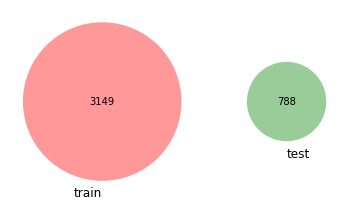

In [63]:
venn2(subsets=(set(idx_tr), set(idx_val)), set_labels=('train', 'test'))

In [69]:
# from vivid.metrics import regression_metrics
from sklearn.metrics import mean_squared_error


def predict(model: nn.Module, loader: data.DataLoader) -> np.ndarray:
    # train とは逆で model 内の学習時にのみ有効な機構がオフになります (Dropouts Layers、BatchNorm Layers...)
    model.eval()
    
    predicts = []
    
    for x_i, y_i in loader:
        
        # 明示的に勾配を計算しないように指定することができます. 
        # この関数ではモデルの更新はせずに単に出力だけを使いますので勾配は不要です.
        with torch.no_grad():
            output = model(x_i.to(DEVICE))

        predicts.extend(output.data.cpu().numpy())

    pred = np.array(predicts).reshape(-1)
    return pred


def calculate_metrics(y_true, y_pred) -> dict:
    """正解ラベルと予測ラベルから指標を計算する"""
    # return regression_metrics(y_true, y_pred)
    
    return {
        'rmse': mean_squared_error(y_true, y_pred) ** .5
    }


def valid(
    model: nn.Module, 
    y_valid: np.ndarray, 
    valid_loader: data.DataLoader
) -> pd.Series:
    """検証フェーズ
    与えられたモデル・データローダを使って検証フェーズを実行。スコアの dict と予測した値を返す
    """
    
    pred = predict(model, valid_loader)
    score = calculate_metrics(y_valid, pred)
    
    valid_score = pd.Series(score)
    return valid_score.add_prefix("valid_"), pred

In [70]:
from tabulate import tabulate


def run_fold(
    model: nn.Module, 
    train_df: pd.DataFrame, 
    valid_df: pd.DataFrame, 
    y_valid: np.ndarray, 
    output_dir: str, 
    n_epochs=30) -> np.ndarray:
    """
    train / valid に分割されたデータで学習と同時に検証を行なう
    """
    
    os.makedirs(output_i, exist_ok=True)
    
    optimizer = Adam(model.parameters(), lr=1e-3)
    
    # 0: 前準備. dataframe から data loader を作成
    train_dataset = AtmaDataset(meta_df=train_df)
    # 検証用の方は is_train=False にしてデータ拡張オフにする
    valid_dataset = AtmaDataset(meta_df=valid_df, is_train=False)

    train_loader = data.DataLoader(
        train_dataset, batch_size=64, shuffle=True, drop_last=True, num_workers=4
    )
    valid_loader = data.DataLoader(valid_dataset, batch_size=256, num_workers=4)

    # --- 保存のための変数定義
    score_df = pd.DataFrame()
    valid_score = np.inf
    valid_score_key = "valid_rmse"
    valid_best_pred = None
    
    for epoch in range(1, n_epochs + 1):
        print(f'start {epoch}')
        
        # 1: 学習用データで学習を実行。学習時のロスを取得
        with timer(prefix="train: epoch={}".format(epoch)):
            score_train = train(
                model, optimizer, train_loader
            )

        # 2: 検証データでのスコアを計算
        with timer(prefix="validate"):
            score_valid, y_valid_pred = valid(model=model, valid_loader=valid_loader, y_valid=y_valid)
            
            
        # --- 学習のロスと検証スコアの値をデータフレームに追加
        row = pd.concat([score_train, score_valid])
        row["epoch"] = epoch
        row = pd.DataFrame([row])
        print(tabulate(row, headers=row.columns))
        score_df = pd.concat([score_df, row], ignore_index=True)
        # ---
        
        # 今の検証スコアと過去最高のスコアを比較
        current_score = score_valid[valid_score_key]
        if current_score < valid_score:
            # スコア改善したときモデルを保存する
            print(f'validation score is improved!! {valid_score:.4f} -> {current_score:.4f}')
            torch.save(
                model.state_dict(), os.path.join(output_dir, 'model_best.pth')
            )
            valid_score = current_score
            valid_best_pred = y_valid_pred
    
    score_df.to_csv(os.path.join(output_dir, 'score.csv'), index=False)
    return valid_best_pred

In [73]:
def get_output_dir(n_cv: int):
    return os.path.join(output_dir, 'simple_reset', f'cv={n_cv}')

oof = np.zeros((len(train_df), ), dtype=np.float32)

for i, (idx_tr, idx_valid) in enumerate(cv):
    output_i = get_output_dir(i)
    model = resnet34(pretrained=False)
    model.fc = nn.Linear(in_features=512, out_features=1, bias=True)
    
    model.to(DEVICE)
    
    oof_i = run_fold(
        model=model,
        train_df=train_meta_df.iloc[idx_tr],
        valid_df=train_meta_df.iloc[idx_valid],
        y_valid=train_meta_df['target'].values[idx_valid],
        output_dir=output_i,
        n_epochs=1
    )
    
    oof[idx_valid] = oof_i

start 1
train: epoch=1 9.669[s]
validate 2.090[s]
      train_loss    valid_rmse    epoch
--  ------------  ------------  -------
 0       3.23121       0.97234        1
validation score is improved!! inf -> 0.9723
start 1
train: epoch=1 9.624[s]
validate 2.140[s]
      train_loss    valid_rmse    epoch
--  ------------  ------------  -------
 0       1.98106       1.36071        1
validation score is improved!! inf -> 1.3607
start 1
train: epoch=1 9.585[s]
validate 2.140[s]
      train_loss    valid_rmse    epoch
--  ------------  ------------  -------
 0       3.21907      0.952215        1
validation score is improved!! inf -> 0.9522
start 1
train: epoch=1 9.556[s]
validate 2.090[s]
      train_loss    valid_rmse    epoch
--  ------------  ------------  -------
 0       2.02055      0.964341        1
validation score is improved!! inf -> 0.9643
start 1
train: epoch=1 9.577[s]
validate 2.151[s]
      train_loss    valid_rmse    epoch
--  ------------  ------------  -------
 0       2

In [75]:
calculate_metrics(train_df['target'], oof)

{'rmse': 0.9430162352004229}

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

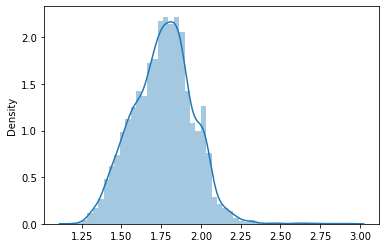

In [76]:
sns.distplot(oof)

In [79]:
def create_metadata(input_df):
    out_df = input_df[['object_id']].copy()
    out_df['object_path'] = input_df['object_id'].map(to_img_path)
    
    if "target" in input_df:
        out_df["target"] = input_df["target"]
        
    return out_df

test_meta_df = create_metadata(test_df)

test_dataset = AtmaDataset(meta_df=test_meta_df, is_train=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=128, drop_last=False, num_workers=4)


In [81]:
test_predictions = []
for i in range(len(cv)):
    output_i = get_output_dir(i)
    model = resnet34(pretrained=False)
    model.fc = nn.Linear(in_features=512, out_features=1, bias=True)
    
    model_path = os.path.join(output_i, 'model_best.pth')
    
    model.load_state_dict(torch.load(model_path))
    
    model.to(DEVICE)
    
    with timer(prefix=f'pred cv={i}'):
        y_pred_i = predict(model, loader=test_loader)
        
    test_predictions.append(y_pred_i)

pred cv=0 8.114[s]
pred cv=1 7.977[s]
pred cv=2 8.231[s]
pred cv=3 7.874[s]
pred cv=4 8.310[s]


In [88]:
pred_mean = np.array(test_predictions).mean(axis=0)

pd.DataFrame({
    "target": pred_mean
}).to_csv(os.path.join(output_dir,"001__sub.csv"), index=False)

In [89]:
pip list -o

Package                        Version             Latest       Type
------------------------------ ------------------- ------------ -----
absl-py                        0.12.0              0.13.0       wheel
adal                           1.2.6               1.2.7        wheel
aiobotocore                    1.3.0               1.3.3        sdist
aiohttp                        3.7.4               3.7.4.post0  wheel
albumentations                 0.5.2               1.0.2        wheel
allennlp                       2.4.0               2.5.0        wheel
arrow                          1.0.3               1.1.1        wheel
attrs                          20.3.0              21.2.0       wheel
backports.functools-lru-cache  1.6.3               1.6.4        wheel
biopython                      1.78                1.79         wheel
bokeh                          2.3.2               2.3.3        sdist
boto3                          1.17.83             1.17.110     wheel
botocore             

Note: you may need to restart the kernel to use updated packages.


In [90]:
pip install -U pip

     |████████████████████████████████| 1.5 MB 825 kB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.1.2
    Uninstalling pip-21.1.2:
      Successfully uninstalled pip-21.1.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip uninstall -y scikit-learn
!pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

Found existing installation: scikit-learn 1.0.dev0
Uninstalling scikit-learn-1.0.dev0:
  Successfully uninstalled scikit-learn-1.0.dev0
Looking in indexes: https://pypi.org/simple, https://pypi.anaconda.org/scipy-wheels-nightly/simple
     |████████████████████████████████| 22.9 MB 524 kB/s eta 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.
pyldavis 3.3.1 requires pandas>=1.2.0, but you have pandas 1.1.5 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.2 which is incompatible.
autogluon-core 0.2.0 requires scikit-learn<0.25,>=0.23.2, but you have scikit-learn 1.0.dev0 which is incompatible.


In [3]:
from sklearn.model_selection import StratifiedGroupKFold

In [4]:
!python -c "import sklearn; sklearn.show_versions()"


System:
    python: 3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37)  [GCC 9.3.0]
executable: /opt/conda/bin/python
   machine: Linux-5.4.91-microsoft-standard-WSL2-x86_64-with-debian-buster-sid

Python dependencies:
          pip: 21.1.3
   setuptools: 49.6.0.post20210108
      sklearn: 1.0.dev0
        numpy: 1.19.5
        scipy: 1.6.2
       Cython: 0.29.23
       pandas: 1.1.5
   matplotlib: 3.4.2
       joblib: 1.0.1
threadpoolctl: 2.1.0

Built with OpenMP: True
